### Imports

In [5]:
from dynaconf import settings
import sys
sys.path.append("..")
from src import db_tools as dbt
from src import ds_tools as dst

### Scoring

In [ ]:
db = dbt.SQLiteDB(settings.DATABASE)
scorer = dst.Scorer(db)

Loading data ...
IDs loaded, 50010 rows
Loaded 3 features from set1
Loaded 1 features from set2
Loaded 1 features from set3
Loaded 4 features from set4
Loaded 5 features from set5
All data loaded successfully, shape: (50010, 15)
Model loaded from: ../model/model.sav
Scoring data ...
Scoring completed
Saving scoring ...


6253it [00:00, 62169.28it/s]

Scoring saved to file: ../scoring/scoring_20200323.csv


50010it [00:00, 65344.70it/s]


Scoring loaded to table: scoring_20200323


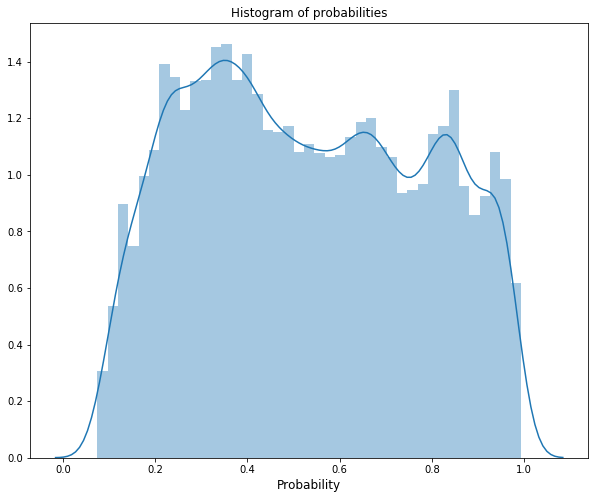

In [3]:
scorer.run(source=settings.TEST_SOURCE, 
           feature_source=settings.FEATURE_SELECTION.top_features, 
           model=settings.MODEL_BUILDING['model'],
           id_column=settings.ID_COLUMN,
           pred_col=settings.SCORING.probability_column, 
           scoring_filename=settings.SCORING.scoring_filename, 
           scoring_table=settings.SCORING.scoring_table,
           silent=settings.SILENT)

In [4]:
db.execute("drop table scoring_20200323")